# Homework 10: Linear Regression


**Reading**: Textbook chapter [15](https://www.inferentialthinking.com/chapters/15/prediction.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the required packages.

Homework 9 is due **Monday, 4/15 at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the course's policy. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data.

In [4]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the [documentation for `scatter`](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

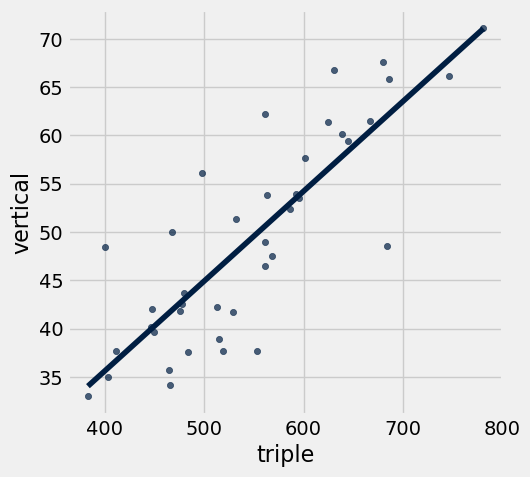

In [5]:
jumps.scatter('triple', 'vertical', fit_line=True)# x and y

#### Question 2
Does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

*Write your answer here, replacing this text.*
It is a positive correlation about r= 0.834307697284. Which is above the given values. This representes a string correlation.

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a table with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [33]:
def regression_parameters(t):
    x_values = t.column(0).astype(float)
    y_values = t.column(1).astype(float)
    
    mean_x = sum(x_values) / len(x_values)
    mean_y = sum(y_values) / len(y_values)
    
    
    variance_x = 0
    variance_y = 0
    for i in range(len(x_values)):
        variance_x += (x_values[i] - mean_x) ** 2
        variance_y += (y_values[i] - mean_y) ** 2
    variance_x /= len(x_values) - 1
    variance_y /= len(y_values) - 1
    
  
    std_dev_x = variance_x ** 0.5
    std_dev_y = variance_y ** 0.5
    
    
    covariance = 0
    for i in range(len(x_values)):
        covariance += (x_values[i] - mean_x) * (y_values[i] - mean_y)
    covariance /= len(x_values) - 1
    
    
    r = covariance / (std_dev_x * std_dev_y)
    slope = r * (std_dev_y / std_dev_x)
    
   
    intercept = mean_y - slope * mean_x
    
    return make_array(r, slope, intercept)

# Assuming 'jumps' is the table with columns 'triple' as x and 'vertical' as y
parameters = regression_parameters(jumps)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))


r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


#### Question 4
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [34]:
triple_record_vert_est = 18.29
vertical_jump_estimate = parameters.item(1) * triple_record_vert_est + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 18.290000 centimeters


#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

probably less acurate

## 2. Cryptocurrencies


Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable crpytocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attatched to it at any given moment in time. For example, on December 1st, 2017, one BTC costs \$10859.56 and one ETH costs \$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [35]:
btc = Table.read_table('btc.csv')
btc

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5
2015-10-04,238.53,238.26,3502460000,6
2015-10-05,238.15,240.38,3497740000,7
2015-10-06,240.36,246.06,3531230000,8
2015-10-07,246.17,242.97,3617400000,9
2015-10-08,243.07,242.3,3572730000,10


In [36]:
eth = Table.read_table('eth.csv')
eth

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5
2015-10-04,0.686343,0.668379,50556000,6
2015-10-05,0.666784,0.628643,49131600,7
2015-10-06,0.622218,0.650645,45863300,8
2015-10-07,0.650515,0.609388,47964700,9
2015-10-08,0.609501,0.621716,44955900,10


#### Question 1

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values are correlated.

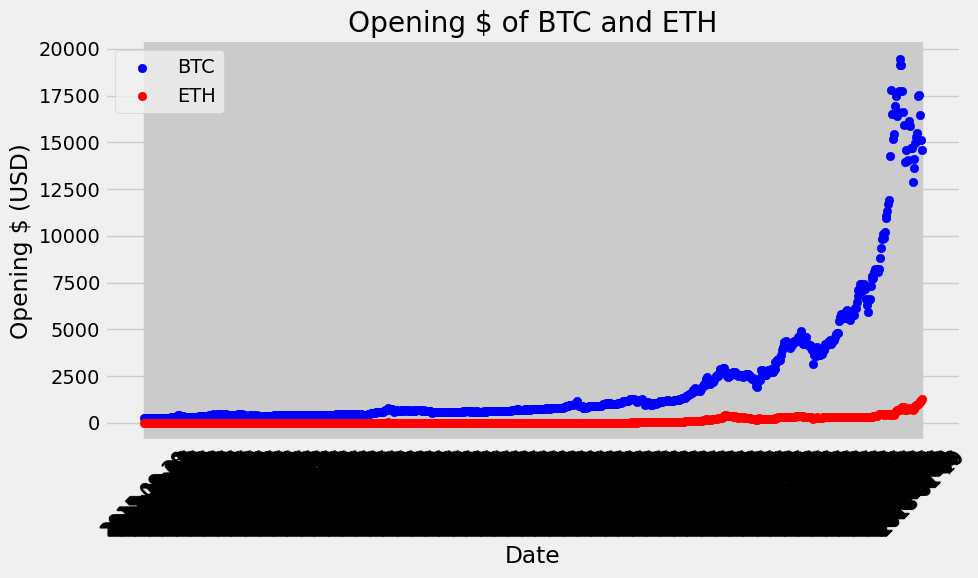

In [37]:
btc_dates = btc.column('date')
btc_open_prices = btc.column('open')
eth_dates = eth.column('date')
eth_open_prices = eth.column('open')

plt.figure(figsize=(10, 6))
plt.scatter(btc_dates, btc_open_prices, color='blue', label='BTC')


plt.scatter(eth_dates, eth_open_prices, color='red', label='ETH')


plt.xlabel('Date')
plt.ylabel('Opening $ (USD)')
plt.title('Opening $ of BTC and ETH')
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()


*Write your answer here, replacing this text.*
There is a point where the opening prices are correlated. Then the pattern changes.

#### Question 2

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

*Hint:* It may be helpful to define and use the function `std_units`.

In [38]:
def std_units(arr): 
    return (arr - np.mean(arr)) / np.std(arr)

standard_btc = std_units(btc_open_prices)
standard_eth = std_units(eth_open_prices)

r = np.mean(standard_btc * standard_eth)
r



0.92503257641482783

#### Question 3
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

In [53]:
def eth_predictor(btc_price, btc_table, eth_table):
    parameters = regression_parameters(btc_table)  
    slope = parameters.item(1)
    intercept = parameters.item(2)
    eth_price_predicted = slope * btc_price + intercept
    return eth_price_predicted


#### Question 4

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://www.inferentialthinking.com/chapters/15/2/regression-line.html
"> here. </a>
* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

In [52]:
btc_prices = btc.column('open')
eth_prices = eth.column('open')
predicted_eth_prices = []

for btc_price in btc_prices:  
    predicted_eth_price = eth_predictor(btc_price, btc, eth) 
    predicted_eth_prices.append(predicted_eth_price)



scatter_data = Table().with_columns(
    'BTC Price', btc_prices,  
    'Real ETH Price', eth_prices,
    'Predicted ETH Price', predicted_eth_prices
)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_data.column('BTC Price'), scatter_data.column('Real ETH Price'), color='blue', label='Real ETH Price')
plt.scatter(scatter_data.column('BTC Price'), scatter_data.column('Predicted ETH Price'), color='red', label='Predicted ETH Price')

# Add labels and title
plt.xlabel('BTC Price (USD)')
plt.ylabel('ETH Price (USD)')
plt.title('Real vs. Predicted')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '2015-09-29'

#### Question 5
For what values of BTC should you be more confident of your predictions? Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features make this model reasonable? If not, what features make it unreasonable?

There is an issue the code in the cell above

#### Question 6

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting ETH price given a BTC price? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching BTC and ETH as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

In [50]:
regression_changes = [False, True, True]# probably
regression_changes

[False, True, True]

## 3. Evaluating NBA Game Predictions


#### A brief introduction to sports betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with more points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**


In [54]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

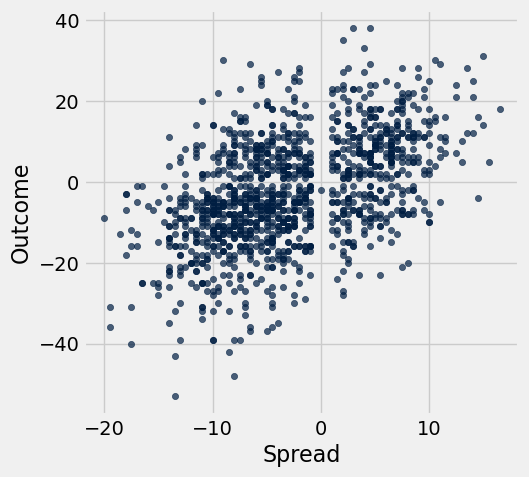

In [55]:
spreads.scatter("Spread", "Outcome")

#### Question 1
Why do you think that the spread and outcome are never 0 (aside from 1 case of the spread being 0)? 

*Write your answer here, replacing this text.*
these avariables are related where different than zero is expected.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the [documentation for the predicate `are.between_or_equal_to`](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

In [56]:
spreads_around_5 = spreads.where('Spread', are.between_or_equal_to(4.5, 5.5))
spread_5_outcome_average = np.mean(spreads_around_5.column('Outcome'))
print("Average outcome for spreads around 5:", spread_5_outcome_average)


Average outcome for spreads around 5: 5.24691358025


#### Question 3
If the average outcome for games with any given spread turned out to be exactly equal to that spread, what would the slope and intercept of the linear regression line be, in original units? Hint: If you're stuck, try drawing a picture!

In [57]:
expected_slope_for_equal_spread = 1
expected_intercept_for_equal_spread = 0

#### Question 4
Fix the `standard_units` function below.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [58]:
def standard_units(nums):
    """Return an array where every value in nums is converted to standard units."""
    mean_nums = np.mean(nums)
    std_nums = np.std(nums)
    return (nums - mean_nums) / std_nums

#### Question 5
Compute the correlation coefficient between outcomes and spreads using the `standard_units` function.

In [59]:
outcomes_su = standard_units(spreads.column('Outcome'))
spreads_su = standard_units(spreads.column('Spread'))

# Compute the correlation coefficient
spread_r = np.corrcoef(outcomes_su, spreads_su)[0, 1]
spread_r

0.49181413688314252

#### Question 6
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

In [60]:
spread_slope = spread_r * (np.std(spreads.column('Outcome')) / np.std(spreads.column('Spread')))
spread_slope

0.95392696822643308

#### Question 7
For the "best fit" line that estimates the average outcome from the spread, the slope is less than 1. Does knowing the slope alone tell you whether the average spread was higher than the average outcome? If so, set the variable name below to `True`. If you think you need more information than just the slope of the regression line to answer that question, then respond `False`. Briefly justify your answer below. (HINT: Does the intercept matter?)

In [61]:
slope_implies_average_spread_above_average_outcome = False

*Write your answer here, replacing this text.*
 We need info live intercept too

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then upload your notebook on Canvas.